##**Face Mask Detection Project**

### **Problem Statement :**-
**Develop an intelligent system capable of detecting whether individuals in images or video streams are wearing face masks accurately. The system should be able to analyze input data from various sources such as images or video feeds in real-time and provide binary classification outputs: 'with mask' or 'without mask.The ultimate goal is to aid in enforcing public health measures and ensure compliance with face mask regulations to mitigate the spread of infectious diseases, such as COVID-19.**

In [ ]:
!pip install kaggle

In [ ]:
# This module provides functions to upload files from the local file system to the Colab environment.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aishwaryaaaaaaaaaaaa","key":"de3cd93f8a42ee7a3c39560320e8193d"}'}

In [ ]:
#import os
#os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
#import os
# Remove the KAGGLE_CONFIG_DIR environment variable
#os.environ.pop("KAGGLE_CONFIG_DIR", None)


 **These Following commands are used to set up the Kaggle API in a Google Colab notebook environment, allowing users to access Kaggle datasets and resources directly from their Colab notebooks.**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 96% 200M/207M [00:02<00:00, 118MB/s]
100% 207M/207M [00:02<00:00, 95.5MB/s]


In [ ]:
!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
# import os

# # Check if the kaggle.json file exists in the ~/.kaggle/ directory
# if os.path.exists("~/.kaggle/kaggle.json"):
#     # Run the code snippet
#     for dirpath, dirnames, filenames in os.walk("/Datasets/New Masks Dataset"):
#         print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
# else:
#     print("kaggle.json file not found in ~/.kaggle/ directory.")


**This code checks whether the Kaggle API configuration is set up in the Google Colab environment and then proceeds to count the number of directories and images within a specific directory.**

In [ ]:
import os

# Check if the ~/.kaggle/ directory exists
if os.path.exists("/root/.kaggle"):
    # Check if the kaggle.json file exists in the ~/.kaggle/ directory
    if os.path.exists("/root/.kaggle/kaggle.json"):
        # Run the code snippet
        for dirpath, dirnames, filenames in os.walk("/content/New Masks Dataset"):
            print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    else:
        print("kaggle.json file not found in ~/.kaggle/ directory.")
else:
    print("The ~/.kaggle/ directory does not exist.")


There are 3 directories and 0 images in '/content/New Masks Dataset'.
There are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
There are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
There are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.
There are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
There are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.
There are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.
There are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
There are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.
There are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.


### **Data  Overview**

In [ ]:
#Importing libraries
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

**This function named view_image is used to display a random image from a specified directory corresponding to a particular class**

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1) #Uses the os.listdir() function to list all the files in the target_folder, then selects a random image filename using random.sample() function.
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['264.jpg']
image shape (480, 480, 3)


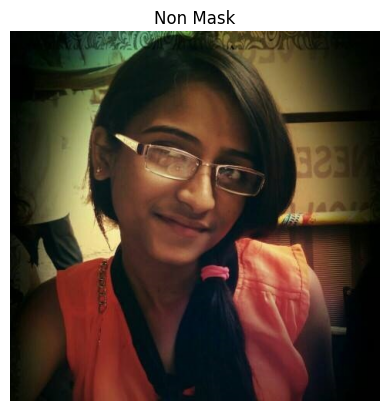

In [ ]:
#display a random image from the directory- Non Mask
img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['1583.jpg']
image shape (1080, 1920, 3)


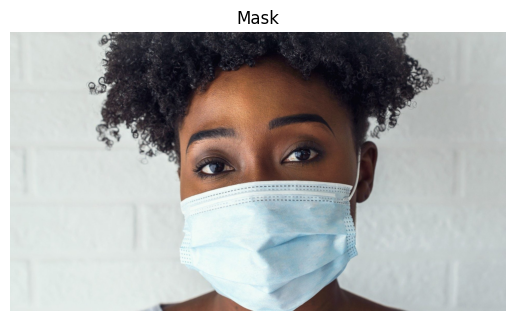

In [ ]:
##display a random image from the directory- Mask
img = view_image("/content/New Masks Dataset/Train/","Mask")

**Overall, this code below reads images from a directory containing images of faces without masks, resizes them to a fixed size, and then appends the resized images to a list (data) along with their corresponding class labels (labels).**

In [ ]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:
  image=cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a)
  image=cv2.resize(image, (224,224))

  data.append(image)
  labels.append(0)


**reads images from a directory containing images of faces with masks, resizes them to a fixed size, and then appends the resized images to a list (data) along with their corresponding class labels (labels).**

In [ ]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:
  image=cv2.imread("/content/New Masks Dataset/Train/Mask/"+a)
  image=cv2.resize(image, (224,224))

  data.append(image)
  labels.append(1)

**Converts the list of image data (data) into a NumPy array and then divides each pixel value by 255.0. Dividing by 255.0 normalizes the pixel values to the range [0, 1].
This normalization step is common in image processing and is often done to ensure that the pixel values are within a consistent range, which can improve the training process of machine learning models.**

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

**Train test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)

##**Model Train**
**This code constructs a CNN model using transfer learning, leveraging the pre-trained MobileNetV2 architecture to detect face masks in images, with additional trainable layers added for fine-tuning on the specific task.**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[224,224,3],weights="imagenet",include_top=False)

for layer in base_model.layers:
  layer.trainable=False

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1,activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs=prediction_layer)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


**During training, the model will go through 15 epochs, updating its weights based on the optimization algorithm specified during compilation ('adam' in this case) and minimizing the loss function (binary_crossentropy). The training progress will be monitored, and performance metrics such as accuracy may be calculated and displayed after each epoch, depending on the model configuration.**

In [ ]:
model.fit(X_train,y_train,epochs=15,batch_size=32)

Epoch 1/15
15/15 [==============================] - 8s 45ms/step - loss: 1.3082 - accuracy: 0.9146
Epoch 2/15
15/15 [==============================] - 1s 45ms/step - loss: 0.2088 - accuracy: 0.9896
Epoch 3/15
15/15 [==============================] - 1s 48ms/step - loss: 0.0031 - accuracy: 0.9979
Epoch 4/15
15/15 [==============================] - 1s 50ms/step - loss: 5.0422e-05 - accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 1s 54ms/step - loss: 3.5850e-06 - accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 1s 46ms/step - loss: 6.7203e-09 - accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 1s 46ms/step - loss: 1.3502e-08 - accuracy: 1.0000
Epoch 8/15
15/15 [==============================] - 1s 45ms/step - loss: 1.4366e-08 - accuracy: 1.0000
Epoch 9/15
15/15 [==============================] - 1s 45ms/step - loss: 1.3981e-08 - accuracy: 1.0000
Epoch 10/15
15/15 [==============================] - 1s 46ms/step - loss: 1.2638e-08 

In [ ]:
predictions=model.predict(X_test)
predictions

In [ ]:
#We need to conver predictions in between 0 to 1
predict=[]

for i in range(len(predictions)):
  if predictions[i][0]>0.5:
    predict.append(1)
  else:
    predict.append(0)

In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict), columns=["No Mask", "Mask"], index=["No Mask","Mask"])
#Here, in the above written code 6 images have been misclassified out of 120 total images

,No Mask,Mask
No Mask,54,6
Mask,0,60


**The model is saved along with its architecture, weights, and training configuration, allowing it to be reloaded and used for inference or further training in the future.
Saving the trained model is essential for preserving the learned parameters and architecture, enabling reuse without the need to retrain from scratch**

In [ ]:
model_name="/content/mask_new_detection.h5"
tf.keras.models.save_model(model, model_name)

<ipython-input-28-3a17449ee9b6>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_name)


In [ ]:
#Importing Libraries
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
%config Completer.use_jedi = False

**we set up the necessary components for detecting faces in images or video frames using the Haar cascade classifier and then using the loaded model to predict whether the detected faces are wearing masks or not.**

In [ ]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
mask_detection = tf.keras.models.load_model("mask_new_detection.h5")

In [ ]:
text_mask = "Mask"
text_no_mask= "Put your mask on!"
font=cv2.FONT_HERSHEY_TRIPLEX
scale= 0.6

**Overall, this function preprocesses the input image and utilizes the loaded mask detection model to predict whether a person in the image is wearing a mask, returning the probability score for the "mask" class.**

In [ ]:
def predict(image):
  face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  face_frame = cv2.resize(face_frame, (224,224))
  face_frame = img_to_array(face_frame)
  face_frame = np.expand_dims(face_frame, axis=0)
  face_frame = preprocess_input(face_frame)
  prediction = mask_detection.predict(face_frame)
  return prediction[0][0]

**This function, detector, performs face detection and mask prediction on a given grayscale image (gray_image) and its corresponding original image (frame)**

In [ ]:
def detector(gray_image, frame):
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)

    for (x,y,w,h) in faces:
        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)
        # Determine the label based on the mask prediction
        label = "Mask" if mask > 0.5 else "No Mask"
        # Format the label to include the confidence score
        label = "{}: {:.2f}%".format(label, max(mask, 1-mask) * 100)

        if mask > 0.5: #, text =text_mask
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2,lineType=cv2.LINE_AA)
            cv2.putText(frame,label, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),thickness = 2)
        elif mask<=0.5: #text =text_no_mask,
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2,lineType=cv2.LINE_AA)
            cv2.putText(frame, label, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),thickness = 2)

    return frame

**Here it captures video from the default camera (index 0) and performs real-time face mask detection on each frame**

In [ ]:
video_cap = cv2.VideoCapture(0) # Initializes a video capture object to capture video from the default camera (index 0).

while True:
    ret, frame = video_cap.read() # Reads a frame from the video capture object (video_cap) and stores it in the variable frame.
                                  #The return value ret indicates whether the frame was successfully read.
  # Check if frame is successfully read
  #if not ret:
  #  break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detect = detector(gray_frame, frame)
    cv2.imshow("Video",detect)       #Displays the processed frame (detect) in a window titled "Video" using OpenCV's imshow function.

    if cv2.waitKey(1) & 0xFF == 27:  #Waits for a key press event. If the pressed key is the 'Esc' key (key code 27), the loop breaks,
                                     #terminating the video capture and closing the OpenCV windows.
        break

video_cap.release()                 #Releases the video capture object, releasing the camera resources.
cv2.destroyAllWindows()             #Closes all OpenCV windows, effectively terminating the application.

##**Conclusion:**

**In this project, we developed a face mask detection system using deep learning techniques. We leveraged transfer learning with pre-trained convolutional neural networks (CNNs) to train a model capable of accurately detecting whether individuals in images or video streams are wearing face masks.**